In [243]:
import matplotlib.pyplot as plt
import math
from random import *

In [244]:
def makeMean(list):
    sum = 0
    for i in list: 
        sum += i
    return sum / len(list)

def makeVariance(list):
    mean = makeMean(list)
    sum = 0
    for i in list:
        sum += (i - mean) * (i - mean)
    return sum / len(list)  

def covariance(listX,listY):
    meanX = makeMean(listX)
    meanY = makeMean(listY)    
    meanXY = 0
    
    list_length = len(listX)
    sum = 0
    while list_length != 0:
        list_length -= 1
        sum += listX[list_length] * listY[list_length]
    meanXY = sum / len(listX)
    return meanXY - (meanX * meanY)

def correlation(listX,listY):
    stdVarX = math.sqrt(makeVariance(listX))
    stdVarY = math.sqrt(makeVariance(listY))
    covXY = covariance(listX,listY);
    
    if covXY == 0 or stdVarX == 0 or stdVarY == 0:
        return 0
    return covXY / (stdVarX * stdVarY)

def autoCovariance(list, lagNum):
    if lagNum == 0:
        return 0
    
    if lagNum >= len(list):
        print('lag는 인자로 들어오는 배열 데이터의 길이보다 작아야 합니다')
    
    mean = makeMean(list);
    list_length = len(list);
    times = 0;
    autoCov = 0;
    for i in range(0,list_length - lagNum):
        autoCov += (list[i + lagNum] - mean) * (list[i] - mean);
        times += 1;
    
    return autoCov / times;

def autoCorrelation(list, lagNum):
    if lagNum == 0:
        return 0
    
    if lagNum >= len(list):
        print('lag는 인자로 들어오는 배열 데이터의 길이보다 작아야 합니다')
        
    rh = autoCovariance(list, lagNum)
    r0 = autoCovariance(list, 0)
    
    if rh == 0 or r0 == 0: 
        return 0
    return rh / r0

def partialAutoCorrelation(list, lagNum):
    if lagNum == 0:
        return 0
    
    if lagNum >= len(list):
        print('lag는 인자로 들어오는 배열 데이터의 길이보다 작아야 합니다')
        
    alpha = autoCorrelation(list,1)

    listX = []
    listY = []
    list_length = len(list)
    
    while list_length != 0:
        if list_length - lagNum == 0:
            break
        
        list_length -= 1
        el_x = list[list_length]
        el_y = list[list_length-lagNum]

        temp_lagNum = lagNum;
        while temp_lagNum != 0:
            temp_lagNum -= 1
            operand = (alpha * list[list_length - temp_lagNum])
            el_x -= operand;
            el_y -= operand;
        

        listX.append(el_x)
        listY.append(el_y)
    
        
    temp_lagNum = lagNum;

    listX.append(-(alpha * list[0]))
    listY.append(list[temp_lagNum] -(alpha * list[0]))

    while temp_lagNum != 0:
        temp_lagNum -= 1
        listX.append(0)
        listY.append(list[temp_lagNum])
    
    return correlation(listX, listY)

In [225]:
# MA2 계산

In [226]:
def generateMA2():
    x0 = 2;
    x1 = 3;
    xt = 0;

    a_t = uniform(-1,1) 
    a_t_minus_1 = uniform(-1,1) 
    a_t_minus_2 = uniform(-1,1) 

    MA2 = [x0,x1]

    for i in range(2,1440):
        x_t = a_t + (0.7 * a_t_minus_1) + (0.8 * a_t_minus_2)

        a_t_minus_2 = a_t_minus_1
        a_t_minus_1 = a_t
        a_t = uniform(-1,1) 
    
        MA2.append(x_t)
        
    return MA2

In [227]:
MA2 = generateMA2()

In [228]:
MA2_ACF_DATA = []
for i in range(1,140):
    MA2_ACF_DATA.append(autoCorrelation(MA2, i))
    
print(MA2_ACF_DATA)

[0.6109614259376656, 0.3584606557293363, -0.00254683468680643, -0.017616956909127117, -0.008331931175395156, -0.032045256116752095, -0.037646957837395224, -0.04451998165618427, -0.04488223925838692, -0.044567109091069194, -0.037686503550288526, -0.007817972070752903, 0.020157648096475803, 0.03310957535233117, 0.028408946820282215, 0.05185578476009554, 0.04877802195086695, 0.03942095662476301, -0.010481341485719605, -0.035220503108615075, -0.008137661414942201, 0.012470977449814723, 0.019131522728628336, -0.013098890577787516, -0.04549307254409965, -0.05139413315064439, -0.06699213797352642, -0.04835549008497683, -0.05551319737039521, -0.06390145601953916, -0.09000383372617148, -0.11480124289379628, -0.08212134030640775, -0.052405656463892746, 0.0036395758203536426, 0.016677352182837644, 0.01007252256588519, -0.004193984193726659, -0.03924075390764831, -0.041940123636090426, -0.03296978348417036, 0.009712054511141151, 0.049068547763804156, 0.05004809333847088, 0.04290539923617434, 0.022

In [229]:
#MA2 ACF PLOT

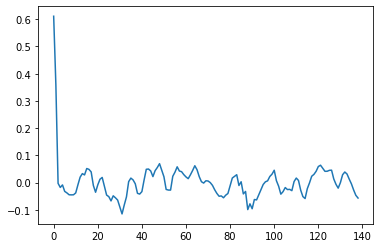

In [230]:
plt.plot(MA2_ACF_DATA)
plt.show()

In [231]:
#MA2 PACF PLOT

In [232]:
MA2_PACF_DATA = []
for i in range(1,140):
    MA2_PACF_DATA.append(partialAutoCorrelation(MA2, i))
    
print(MA2_PACF_DATA)

[-0.0040653974738191065, -0.028169905981757445, 0.36179324144818253, 0.6253110488199923, 0.73539294599586, 0.7890650519525619, 0.8260254428294845, 0.8506816964412579, 0.8693604035976921, 0.8834297662787816, 0.895000684018927, 0.9061573712415236, 0.9152261294785439, 0.9218526363020966, 0.9263947574111917, 0.9324581625767283, 0.9361068171465947, 0.9392307330844488, 0.9398252634786288, 0.9417851884542772, 0.9462649043179759, 0.9498215869228633, 0.9523918092590058, 0.9530135761425546, 0.9536338742771069, 0.9552925584121656, 0.9563950664160475, 0.9585864012614213, 0.9596326547681809, 0.9605212219238212, 0.9607014448997788, 0.9608883954762432, 0.9628028386009885, 0.964459690691351, 0.9667783719498964, 0.9675812081539698, 0.9677354114704588, 0.9676634096136807, 0.9670323515966103, 0.9673320570583842, 0.9679496332980758, 0.9695118821876014, 0.9709022878301177, 0.9711380862169049, 0.9712029478464425, 0.970912573029816, 0.9719255852069417, 0.9726037039235124, 0.9733302509734704, 0.97301852751236

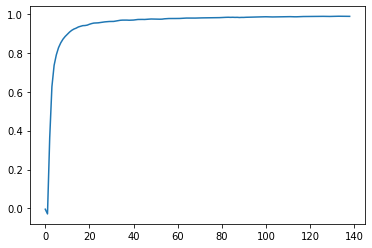

In [233]:
plt.plot(MA2_PACF_DATA)
plt.show()

In [234]:
# AR2 계산

In [235]:
def generateAR2():
    x_t_minus_2 = 2
    x_t_minus_1 = 3
    x_t = 0

    a_t = 0

    AR2 = [x_t_minus_2, x_t_minus_1]
    for i in range(2,1440):
        a_t =  uniform(-1,1) 

        x_t = (1.5 * x_t_minus_1) - (0.75 * x_t_minus_2) + a_t
        x_t_minus_2 = x_t_minus_1
        x_t_minus_1 = x_t

        AR2.append(x_t)
        
    return AR2

In [236]:
AR2 = generateAR2()

In [237]:
AR2_ACF_DATA = []
for i in range(1,140):
    AR2_ACF_DATA.append(autoCorrelation(AR2, i))
    
print(AR2_ACF_DATA)

[0.8547460642714002, 0.5230504441683003, 0.13173091339218396, -0.2090776686163381, -0.4219808933739707, -0.4763682184765242, -0.3963727236695738, -0.239875476364738, -0.06847547655047075, 0.07255825097653536, 0.16131933435789578, 0.19197808146415482, 0.1796414152639782, 0.14081109069436243, 0.09110670618246124, 0.038791029466346404, -0.010610202126909248, -0.052960834535755126, -0.07967488853333075, -0.09001538557067146, -0.08750288466576746, -0.07260016282340158, -0.04556792703030419, -0.009852391644922976, 0.02699140842773542, 0.0572031151854645, 0.07304850352570585, 0.06853023556595603, 0.042645585900211, 0.0010387303509841019, -0.043283391675839604, -0.08032437399202544, -0.09991026739781453, -0.09333197717773613, -0.06036368713448977, -0.009583909489713174, 0.04835135209034517, 0.09329732438104345, 0.11307024421784578, 0.10442606164255493, 0.07475500855397066, 0.03340331945669155, -0.010701826968191917, -0.04836501415360881, -0.07133118179797954, -0.07751901425852968, -0.068769808

In [238]:
#AR2 ACF PLOT

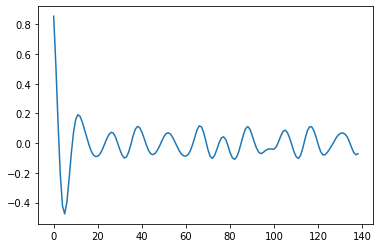

In [239]:
plt.plot(AR2_ACF_DATA)
plt.show()

In [240]:
#AR2 PACF PLOT

In [241]:
AR2_PACF_DATA = []
for i in range(1,140):
    AR2_PACF_DATA.append(partialAutoCorrelation(AR2, i))
    
print(AR2_PACF_DATA)

[-0.0062865236360195535, 0.5475181703360912, 0.7427591299246366, 0.8136416353633462, 0.8536626974614232, 0.8818700124381108, 0.9037769654311366, 0.921148721355143, 0.9345189282548179, 0.9440258920415602, 0.9500284494387928, 0.9528304833026369, 0.953695051644854, 0.9538259178108802, 0.9541085940520666, 0.9547645277897107, 0.9557451646492096, 0.9569760162534287, 0.958625408036697, 0.960571721556446, 0.962573996108987, 0.96461229851163, 0.9667035680807596, 0.9688004214508353, 0.9707458629885394, 0.9723731544851032, 0.9735447819187313, 0.9741653570832989, 0.9742855022924194, 0.9740927053035023, 0.9738834557441928, 0.9738560546340977, 0.9741915071053442, 0.9750153103423813, 0.9762796161249546, 0.9778004875540128, 0.9793612018671115, 0.980598115361135, 0.981308064288751, 0.9814762673710639, 0.9812893711383711, 0.9809528571626047, 0.9806366050455441, 0.980473883993192, 0.9805804361233178, 0.980940307167532, 0.9814965758833496, 0.9821955272197845, 0.982950294148357, 0.9837445877685695, 0.98444

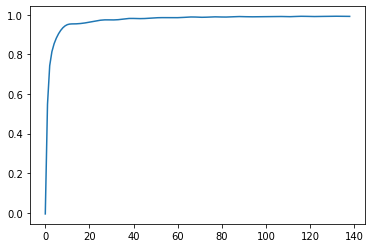

In [242]:
plt.plot(AR2_PACF_DATA)
plt.show()